# Task 1: Coding the Central Dogma

## 1.1 Write a function that finds the complementary sequence of a given DNA sequence

In [1]:
def dna_complementary (dna_seq, direction='same'): #defining function by providing providing arguments dna_seq and direction
    
    if type(dna_seq)!= str:
        raise ValueError('Sequence is non-canonical') #ValueError for non-canonical inputs
        
    base_pairs = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'} #creating dictionary for complementary base pairs
    
    dna_seq = dna_seq.upper() # Converting the DNA sequence to uppercase
    
    c_dna= [] 
    
    for base in dna_seq: #checking for non-canonical errors
        if base not in base_pairs:
            raise ValueError(f"Non-canonical base found: {base}. DNA sequence should only contain A, T, C, or G.")
        else:
            c_dna.append(base_pairs[base])
    
    if direction== 'same':
        return ''.join([str(elem) for elem in c_dna])
    elif direction== 'reverse':
        return ''.join([str(elem) for elem in c_dna])[::-1]
    else:
        raise ValueError('Direction should be either same or reverse')
    
    pass

In [3]:
dna_complementary('atccgaatgcc', direction= 'same')

'TAGGCTTACGG'

In [4]:
dna_complementary('atccgaatgcc', direction= 'reverse')

'GGCATTCGGAT'

In [2]:
dna_complementary('ccgtaagccta', direction= 'same')

'GGCATTCGGAT'

In [5]:
dna_complementary('atccgaatg$#@cc', direction= 'reverse')

ValueError: Non-canonical base found: $. DNA sequence should only contain A, T, C, or G.

In [ ]:
dna_complementary('atccgaatg87cc', direction= 'reverse')

In [ ]:
dna_complementary('atccgaatgcc', direction= 'p')

## 1.2 Write a function that finds the RNA sequence of a given DNA sequence

In [28]:
def dna_rna(dna_seq):
    if type(dna_seq)!= str:
        raise ValueError('Sequence is non-canonical')
    
    dna_seq= dna_seq.upper()
    
    for base in dna_seq:
        if base not in ['A', 'T', 'G', 'C', 'U']:
            raise ValueError('Sequence is non-canonical')
        
    if 'U' in dna_seq:
        raise ValueError('Sequence is already an RNA sequence')
        print(dna_seq)
    
    else:
        return dna_seq.replace('T', 'U') 

In [29]:
dna_rna('atgcaattccgga')

'AUGCAAUUCCGGA'

In [30]:
dna_rna('atgcaatt855cgga')

ValueError: Sequence is non-canonical

In [31]:
dna_rna('atgcaa#$%ccgga')

ValueError: Sequence is non-canonical

In [32]:
dna_rna('atgcaauuccgga')

ValueError: Sequence is already an RNA sequence

## 1.3 Write a function that finds the amino acid sequence of a given RNA sequence

In [33]:
def rna_aa(rna_seq):
    
    codons = {
        "UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L",
        "UCU":"S", "UCC":"s", "UCA":"S", "UCG":"S",
        "UAU":"Y", "UAC":"Y", "UAA":"*", "UAG":"*",
        "UGU":"C", "UGC":"C", "UGA":"*", "UGG":"W",
        "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L",
        "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P",
        "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
        "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R",
        "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M",
        "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T",
        "AAU":"N", "AAC":"N", "AAA":"K", "AAG":"K",
        "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R",
        "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V",
        "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A",
        "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E",
        "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G",
        "AUG":"M" 
    }

    aa_seq = '' # empty string for storing the amino acid sequence
    start_translation = False

    if len(rna_seq)%3 == 1:
        seq_final= rna_seq[:-1]
        
    if len(rna_seq)%3 == 2:
        seq_final= rna_seq[:-2]
            
    else:
        seq_final = rna_seq

    for i in range(0, len(seq_final), 3):
        codon = seq_final[i:i+3]
        
        if start_translation:
            if codon in codons:
                aa = codons[codon]
                if aa == "*":
                    break
                aa_seq += aa
        elif codon == "AUG":
            start_translation = True
            aa = codons[codon]
            aa_seq += aa
            
    return aa_seq

In [34]:
a= rna_aa('AUGGUUGUC')

In [35]:
a

'MVV'

## 1.4 Tying it all together: Write a higher-order function that combines 1.1-1.3.

In [36]:
def dna_aa(seq, direction= 'same'):
    c_dna = dna_complementary(seq, direction= direction) #Calling all the above created functions for- complementary DNA , RNA from DNA and amino acid sequence from RNA
    rna_seq = dna_rna(c_dna)
    aa_seq = rna_aa(rna_seq)

    print("c_DNA for given DNA sequence in direction= " +direction+ " is " +c_dna)
    print("The RNA sequence of the given DNA sequence is "+rna_seq)
    print("The protein sequence of the given DNA is "  +aa_seq)
    
    if aa_seq!= "":
        print("Protein sequence for given DNA is "+ aa_seq)
    else:
        print("No start codon found to start the translation.")
    
pass

In [37]:
dna_aa('TACACCTAA')

c_DNA for given DNA sequence in direction= same is ATGTGGATT
The RNA sequence of the given DNA sequence is AUGUGGAUU
The protein sequence of the given DNA is MWI
Protein sequence for given DNA is MWI


## 1.5 Protein annotator

In [38]:
pip install minotaor

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install dna_features_viewer

Note: you may need to restart the kernel to use updated packages.


In [40]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Replace the sequence with your own sequence
protein = Seq("MIRLGAPQSLVLLTLLVAAVLRCQGQDVRQPGPKGQKGEPGDIKDIVGPKGPPGPQGPAGEQGPRGDRGDKGEKGAPGPRGRDGEPGTPGNPGPPGPPGPPGPPGLGGNFAAQMAGGFDEKAGGAQLGVMQGPMGPMGPRGPPGPAGAPGPQGFQGNPGEPGEPGVSGPMGPRGPPGPPGKPGDDGEAGKPGKAGERGPPGPQGARGFPGTPGLPGVKGHRGYPGLDGAKGEAGAPGVKGESGSPGENGSPGPMGPRGLPGERGRTGPAGAAGARGNDGQPGPAGPPGPVGPAGGPGFPGAPGAKGEAGPTGARGPEGAQGPRGEPGTPGSPGPAGASGNPGTDGIPGAKGSAGAPGIAGAPGFPGPRGPPGPQGATGPLGPKGQTGEPGIAGFKGEQGPKGEPGPAGPQGAPGPAGEEGKRGARGEPGGVGPIGPPGERGAPGNRGFPGQDGLAGPKGAPGERGPSGLAGPKGANGDPGRPGEPGLPGARGLTGRPGDAGPQGKVGPSGAPGEDGRPGPPGPQGARGQPGVMGFPGPKGANGEPGKAGEKGLPGAPGLRGLPGKDGETGAAGPPGPAGPAGERGEQGAPGPSGFQGLPGPPGPPGEGGKPGDQGVPGEAGAPGLVGPRGERGFPGERGSPGAQGLQGPRGLPGTPGTDGPKGASGPAGPPGAQGPPGLQGMPGERGAAGIAGPKGDRGDVGEKGPEGAPGKDGGRGLTGPIGPPGPAGANGEKGEVGPPGPAGSAGARGAPGERGETGPPGPAGFAGPPGADGQPGAKGEQGEAGQKGDAGAPGPQGPSGAPGPQGPTGVTGPKGARGAQGPPGATGFPGAAGRVGPPGSNGNPGPPGPPGPSGKDGPKGARGDSGPPGRAGEPGLQGPAGPPGEKGEPGDDGPSGAEGPPGPQGLAGQRGIVGLPGQRGERGFPGLPGPSGEPGKQGAPGASGDRGPPGPVGPPGLTGPAGEPGRQGSPGADGPPGRDGAAGVKGDRGETGAVGAPGTPGPPGSPGPAGPTGKQGDRGEAGAQGPMGPSGPAGARGIQGPQGPRGDKGEAGEPGERGLKGHRGFTGLQGLPGPPGPSGDQGASGPAGPSGPRGPPGPVGPSGKDGANGIPGPIGPPGPRGRSGETGPAGPPGNPGPPGPPGPPGPGIDMSAFAGLGPR")
protein_record = SeqRecord(protein, id="human collagen", annotations={"molecule_type": "protein"})

protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive

In [41]:
protein_record

SeqRecord(seq=Seq('MIRLGAPQSLVLLTLLVAAVLRCQGQDVRQPGPKGQKGEPGDIKDIVGPKGPPG...GPR'), id='human collagen', name='<unknown name>', description='<unknown description>', dbxrefs=[])

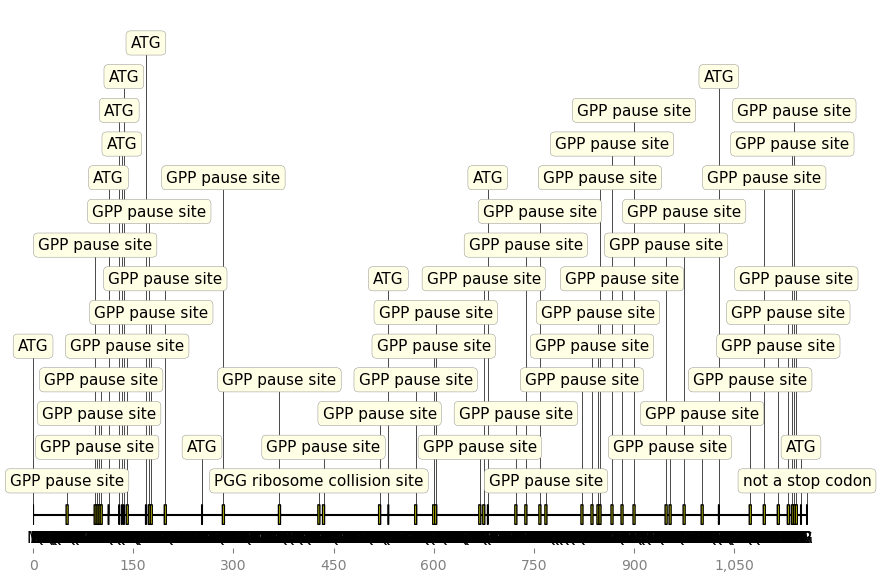

In [42]:
graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
graphic_record.plot_sequence(ax)

- The protein sequence annotated here is of Human Collagen COL2A1, partial [Homo sapiens]. 
- I can observe that the sequence is 1160 AA long protein. Since it is a partial sequence for A1 domain of the protein structure, there is no stop codon in the sequence. 
- There are various start codons and pause sites in the sequence.  

# Task 2: Wrapping it all together with raw data

2.1 Write a function that reads the fastq file and extracts all sequences that have a quality scores above Q10.

In [43]:
def extract_seqs(fasta_file_path):
    ids = []
    seq = []
    bases = ['A', 'T', 'G', 'C']
    with open (fasta_file_path , 'r') as input_file:
        while True:
            id_ind = input_file.readline().strip()
            sequence = input_file.readline().strip()
            plus = input_file.readline().strip()
            quality = input_file.readline().strip()
            
            if not id_ind:
                break
            
            # Calculate the average quality score
            average_quality = sum(ord(q) - 33 for q in quality) / len(quality)
            
            if average_quality > 10 and all([i in bases for i in sequence]):
                ids.append(id_ind)
                seq.append(sequence)                              
    return(dict(map(lambda i,j : (i,j) ,ids,seq)))
pass

In [44]:
x= extract_seqs('sample10000.fastq')

In [67]:
class Genome:
    """
    Read, store, and analyze the contents of a genome from a FASTA file
    """
    def __init__(self, filepath):
        self.filepath = filepath
        self.dna_seqs = None
        self.dna_complementary_seqs = None
        self.rna_seqs = None
        self.aa_seqs = None
    
    # UPDATE THE FOLLOWING FUNCTIONS TO POPULATE THE ABOVE PROPERTIES
    def extract_seqs(self):
        self.dna_seqs = extract_seqs(self.filepath)
        return self.dna_seqs
        pass
    
    def complementary_seqs(self):
        if self.dna_seqs==None:
            raise ValueError("There are no sequences to find complementary of.")    
        else:
            complementary = []
            for seq in self.dna_seqs.values():
                complementary.append(dna_complementary(seq))
            self.dna_complementary_seqs = dict(map(lambda i,j : (i,j) ,self.dna_seqs.keys(),complementary))
            return self.dna_complementary_seqs 
        pass

    def dna_rna(self):
        if self.dna_complementary_seqs==None:
            raise ValueError("There are no sequences to find corresponding RNA sequence of.")    
        else:
            RNA = []
            for seq in self.dna_complementary_seqs.values():
                RNA.append(dna_rna(seq))
            self.rna_seqs = dict(map(lambda i,j : (i,j) ,self.dna_complementary_seqs.keys(),RNA))
        return self.rna_seqs
        pass
    
    def aa_seqs_func(self):
        if self.rna_seqs==None:
            raise ValueError("There are no sequences to translate to Protein.")    
        else:
            aa = []
            for seq in self.rna_seqs.values():
                aa.append(rna_aa(seq))
            self.aa_seqs = dict(map(lambda i,j : (i,j) ,self.rna_seqs.keys(),aa))
        return self.aa_seqs
        

    def annot_aa_plot(self, seqid):
        if self.aa_seqs==None or self.aa_seqs[seqid]=='':
            raise ValueError("There are no Proteins to display the annotated plot of.")
        else:
            protein = Seq(self.aa_seqs[seqid])
            protein_record = SeqRecord(protein, id="example", annotations={"molecule_type": "protein"})
            protein_record = minotaor.annotate_record(protein_record)
            graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
            ax, _ = graphic_record.plot(figure_width=20, strand_in_label_threshold=7)
            graphic_record.plot_sequence(ax)
        return graphic_record.plot_sequence(ax)
        pass

In [68]:
a = Genome('sample10000.fastq')

In [69]:
b = a.extract_seqs()

In [70]:
c = a.complementary_seqs()

In [71]:
d = a.dna_rna()

In [73]:
e = a.aa_seqs_func()

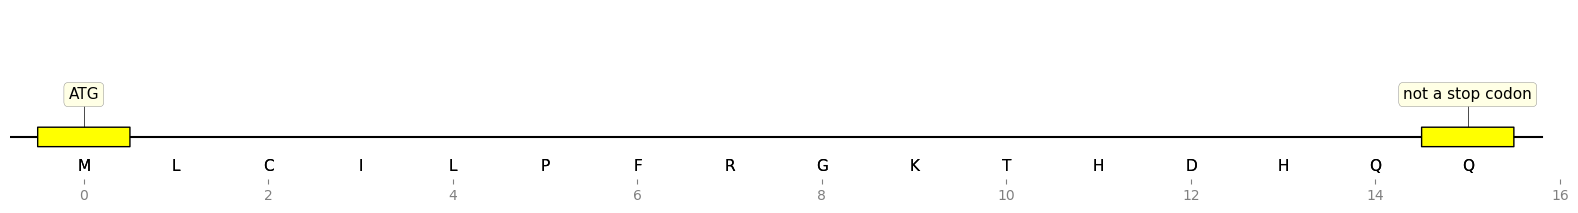

In [77]:
a.annot_aa_plot('@ERR016162.18612616 I354_1:1:62:12043:8728/2')